# Ocean Tide Simulation

In [59]:
# Brent Brison
# Christian Garces
# Tuo Zhang
# Alina Troncoso

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


convert_time = lambda x: x.decode()

data = np.loadtxt("ASTR19_F23_group_project_data.txt", dtype={'names': ('day', 'time', 'height'), 'formats': ('i4', 'U5', 'f4')}, converters={1: convert_time}, skiprows=1)

In [61]:
def time_str_to_float(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60.0

time_string = data['time']

vectorized_conversion = np.vectorize(time_str_to_float)

time_float = vectorized_conversion(time_string)

print(time_float)


[ 8.11666667 15.61666667  8.91666667 16.41666667  9.75       17.23333333
 10.58333333 18.         11.46666667 18.76666667 12.36666667 19.51666667
 13.4        20.26666667  3.36666667 21.01666667  4.11666667 21.76666667
  4.83333333 11.96666667  5.51666667 12.93333333  6.13333333 13.75
  6.78333333 14.41666667  7.36666667 15.          7.98333333 15.56666667
  8.56666667 16.13333333  9.16666667 16.68333333  9.75       17.2
 10.35       17.75       10.95       18.25       11.63333333 18.8
 12.41666667 19.33333333  2.36666667 19.86666667  2.96666667 20.5
  3.61666667 10.73333333  4.38333333 11.91666667  5.25       12.95
  6.15       13.83333333  7.08333333 14.65        7.96666667 15.45
  8.83333333 16.16666667  9.66666667 16.86666667 10.5        17.56666667
 11.31666667 18.2        12.16666667 18.81666667  1.53333333 19.4
  2.21666667 20.          2.9         9.9         3.65       11.25
  4.48333333 12.36666667  5.35       13.23333333]


In [62]:
def tidal_height(t, A, B, omega_1, omega_2, phi_1, phi_2, C):
    return A * np.sin(omega_1 * t + phi_1) + B * np.sin(omega_2 * t + phi_2) + C
    

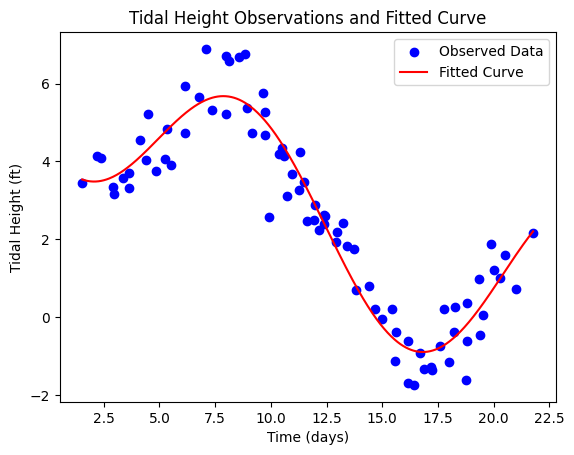

In [63]:
time = time_float
height = data['height']
initial_guesses = [1, 1, 2*np.pi/12.42, 2*np.pi/24, 0, 0, 1]
rms_error = 0.25
sigma_values = np.full_like(height, rms_error)

params, params_covariance = curve_fit(
    tidal_height, 
    time, 
    height, 
    p0=initial_guesses, 
    sigma=sigma_values,
    absolute_sigma=True,
    maxfev=10000
)

time_plot = np.linspace(time.min(), time.max(), 500)
height_predicted = tidal_height(time_plot, *params)

plt.scatter(time, height, label='Observed Data', color='blue')
plt.plot(time_plot, height_predicted, label='Fitted Curve', color='red')
plt.xlabel('Time (days)')
plt.ylabel('Tidal Height (ft)')
plt.title('Tidal Height Observations and Fitted Curve')
plt.legend()

# Display the plot
plt.show()
